In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# load rtx4060 data
all_data = []
for ncpu in [1, 2, 4, 8, 16, 32]:
    df = pd.read_csv(f'notes/data/rtx4060/{ncpu}cpu.csv')
    df['gpu_type'] = 'rtx4060'
    df['ncpu'] = ncpu
    all_data.append(df)

for ncpu in [1, 2, 4, 8, 16, 32]:
    df = pd.read_csv(f'notes/data/h100/{ncpu}cpu.csv')
    df['gpu_type'] = 'h100'
    df['ncpu'] = ncpu
    all_data.append(df)

for ncpu in [1, 2, 4, 8, 16, 32]:
    df = pd.read_csv(f'notes/data/rtx4090/{ncpu}cpu.csv')
    df['gpu_type'] = 'rtx4090'
    df['ncpu'] = ncpu
    all_data.append(df)

df = pd.concat(all_data, ignore_index=True)
is_alkane = df['structure'].str.contains('alkane')
df['is_alkane'] = is_alkane
df

,structure,nat,nprim,maxl,max_nnl,mean_nnl,max_nsh,cpu_time,gpu_gb_in,gpu_gb_out,gpu_gb_total,gpu_between_atoms,gpu_in_atoms,gpu_time,gpu_walltime,gpu_type,ncpu,is_alkane
0,H2,2,6,0,1,0,1,0.032201,0.000001,0.000000,0.000002,7.281664,0.492480,7.774144,69.187210,rtx4060,1,False
1,alkane_10,30,6,1,25,13,2,3.215515,0.000324,0.000317,0.000641,2.578432,1.034464,3.612896,4.231525,rtx4060,1,True
2,dna,387,6,2,164,69,3,498.730106,0.232068,0.231803,0.463871,303.412231,8.185952,311.598175,414.100141,rtx4060,1,False
3,alkane_342,1026,6,1,30,21,2,181.976179,0.370811,0.370542,0.741353,79.875870,5.869568,85.745438,248.167260,rtx4060,1,True
4,1lyz-lysozyme,1102,6,2,309,99,3,1213.720145,1.749900,1.748891,3.498791,955.986145,16.095232,972.081360,1715.990375,rtx4060,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,103l-hydrolase,1404,6,2,312,99,3,325.307688,2.816439,2.815150,5.631589,41.017345,1.554432,42.571777,2346.127744,rtx4090,32,False
179,alkane_674,2022,6,1,30,21,2,163.642543,1.439677,1.439146,2.878823,8.713504,0.841760,9.555264,1135.764560,rtx4090,32,True
180,alkane_1006,3018,6,1,30,21,2,331.831233,3.206922,3.206130,6.413052,12.820224,1.109216,13.929440,2679.265295,rtx4090,32,True
181,alkane_1338,4014,6,1,30,21,2,531.837934,5.672547,5.671493,11.344040,17.142784,1.339392,18.482176,4452.715250,rtx4090,32,True


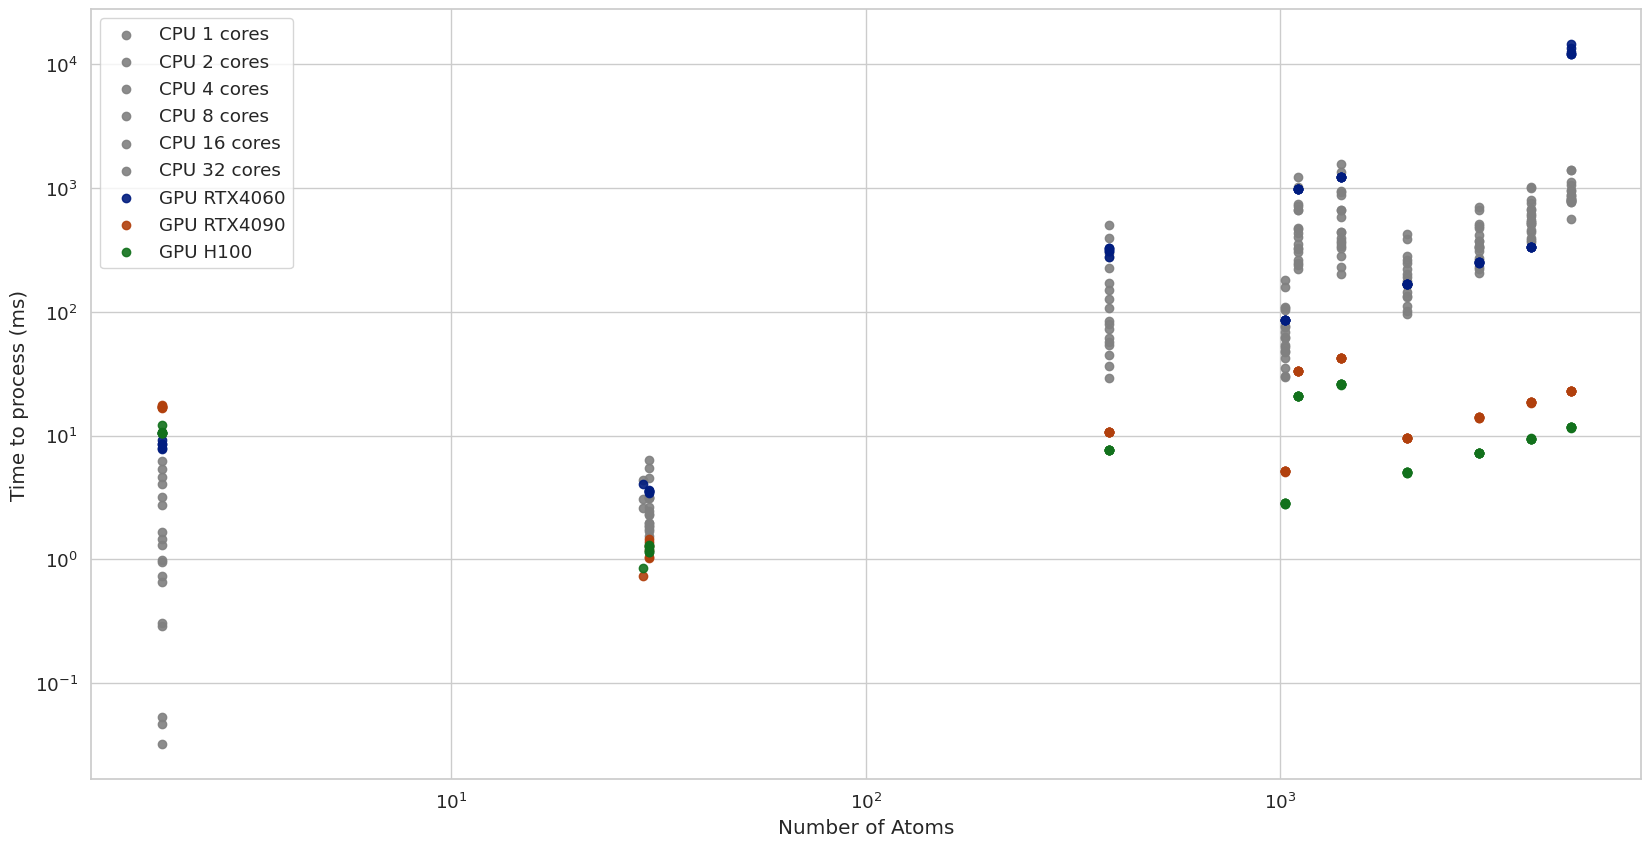

In [ ]:
# First plot, plot 1/cpu_time and 1/gpu_time, over increasing number of atoms `nat` (x-axis).
# Lines: gray to black CPU, 1, 2, ... 32
# Lines: nvidia green, GPUs, rtx4060, rtx4090, h100
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")
sns.set_palette("dark")
sns.set_context("notebook", font_scale=1.2)

# Plot CPU data
df = df.sort_values(by='nat')
natoms = df['nat']
cpu_times = df['cpu_time']
cpu_cores = df['ncpu']
gpu_times = df['gpu_time']
gpu_types = df['gpu_type']

for i, ncpu in enumerate([1, 2, 4, 8, 16, 32]):
  mask = (cpu_cores == ncpu)
  plt.scatter(natoms[mask], cpu_times[mask], 
           label=f'CPU {ncpu} cores', color='gray', alpha=0.9)

# gpu_palette = sns.color_palette("Greens", n_colors=6)  # 3 shades of green for rtx4060, rtx4090, h100
for i, gpu_type in enumerate(['rtx4060', 'rtx4090', 'h100']):
  mask = (gpu_types == gpu_type)
  # color = gpu_palette[i + 3]
  plt.scatter(natoms[mask], gpu_times[mask], label=f'GPU {gpu_type.upper()}', alpha=.9)

plt.xlabel('Number of Atoms')
plt.ylabel('Time to process (ms)')
plt.xscale('log')
plt.yscale('log')
# plt.title('CPU and GPU Performance')
plt.legend()